# Lab 10.5.1 K-mean clustering 

In [2]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# inpiration found at: https://nbviewer.jupyter.org/github/JWarmenhoven/ISL-python/blob/master/Notebooks/Chapter%2010.ipynb
# and: https://github.com/sejlermonster/Statistical-Learning/blob/master/Lab1052.py

In [6]:
# Generate data
np.random.seed(3)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

K = 2

In [7]:
km1 = KMeans(n_clusters=2, n_init=20)
km1.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [8]:
km1.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [9]:
# Sum of distances of samples to their closest cluster center.
km1.inertia_

108.34817900545058

K = 3: We know that there are K =2, but with real data it is not known. Therefor we try with k=3. 

In [10]:
np.random.seed(4)
km2 = KMeans(n_clusters=3, n_init=20)
km2.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=20, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [11]:
pd.Series(km2.labels_).value_counts()
# the size of the clusters are; 21, 20, 9

1    25
0    13
2    12
dtype: int64

In [12]:
km2.cluster_centers_

array([[-0.30264894, -0.72085395],
       [ 2.75473619, -4.34258983],
       [ 0.15055483,  1.2776261 ]])

In [13]:
km2.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 2, 0, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2])

In [14]:
# Sum of distances of samples to their closest cluster center.
km2.inertia_

82.14444621369401

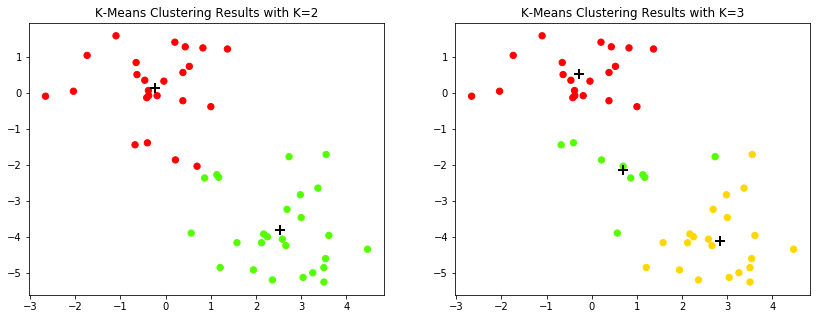

In [20]:

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,5))

ax1.scatter(X[:,0], X[:,1], s=40, c=km1.labels_, cmap=plt.cm.prism) 
ax1.set_title('K-Means Clustering Results with K=2')
ax1.scatter(km1.cluster_centers_[:,0], km1.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2)

ax2.scatter(X[:,0], X[:,1], s=40, c=km2.labels_, cmap=plt.cm.prism) 
ax2.set_title('K-Means Clustering Results with K=3')
ax2.scatter(km2.cluster_centers_[:,0], km2.cluster_centers_[:,1], marker='+', s=100, c='k', linewidth=2);



# Lab 10.5.2 Hierarchical Clustering

In [28]:
from scipy.cluster.hierarchy import dendrogram, linkage, cut_tree
from scipy.spatial import distance
from sklearn.preprocessing import scale

In [29]:
np.random.seed(3)
X = np.random.standard_normal((50,2))
X[:25,0] = X[:25,0]+3
X[:25,1] = X[:25,1]-4

In [30]:
#Using scaling before clustering 
scaled_x = scale(X)
z_complete = (linkage(scaled_x, method='complete', metric='euclidean'))
z_complete = linkage(X, method='complete', metric='euclidean')
z_average = linkage(X, method='average', metric='euclidean')
z_single = linkage(X, method='single', metric='euclidean')

In [32]:
print(cut_tree(z_complete, n_clusters=2).T)
print(cut_tree(z_average, n_clusters=2).T)
print(cut_tree(z_single, n_clusters=2).T)
print(cut_tree(z_single, n_clusters=4).T)

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 1 0 0 0 0 0]]
[[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2
  2 2 2 2 2 2 2 2 3 2 2 2 2 2]]


The response from the abov show how complete and average yields the same results. Single with 2 clusters has alle but one in the same cluster, single with 4 clusters still only has two observation in one cluster and one observation in another. 

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [55.0, 55.0, 65.0, 65.0],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [125.0, 125.0, 135.0, 135.0],
  [115.0, 115.0, 130.0, 130.0],
  [155.0, 155.0, 165.0, 165.0],
  [145.0, 145.0, 160.0, 160.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [185.0, 185.0, 202.5, 202.5],
  [175.0, 175.0, 193.75, 193.75],
  [152.5, 152.5, 184.375, 184.375],
  [122.5, 122.5, 168.4375, 168.4375],
  [225.0, 225.0, 235.0, 235.0],
  [245.0, 245.0, 255.0, 255.0],
  [230.0, 230.0, 250.0, 250.0],
  [145.46875, 145.46875, 240.0, 240.0],
  [92.5, 92.5, 192.734375, 192.734375],
  [75.0, 75.0, 142.6171875, 142.6171875],
  [60.0, 60.0, 108.80859375, 108.80859375],
  [45.0, 45.0, 84.404296875, 84.404296875],
  [35.0, 35.0, 64.7021484375, 64.7021484375],
  [295.0, 295.0, 305.0, 305.0],
  [285.0, 285.0, 300.0, 300.0],
  [315.0, 315.0, 325.0, 325.0],
  [292.5, 292.5, 320.0, 320.0],
  [275.0, 275.0, 306.25, 306.25],
  [355.0, 355.0, 365.0, 365.

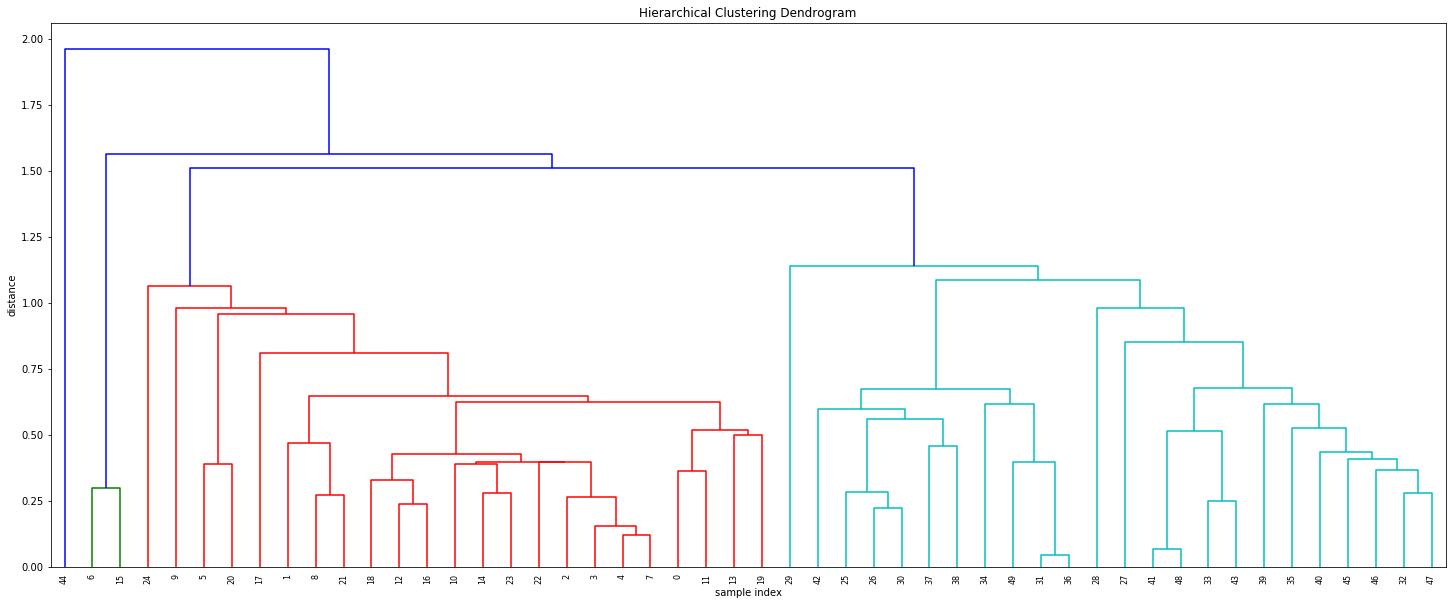

In [33]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    z_single,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)